IMPORTING LIBRARIES

In [ ]:
import pandas as pd


In [ ]:
import numpy as np


GET DATASET

In [ ]:
movies=pd.read_csv('/content/mlpoea.csv')

In [ ]:
movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,0,113,"Comedy, Drama"
1,2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,0,110,"Drama, International"
2,3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,1,74,"Action, Drama, Suspense"
3,4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,0,64,Documentary
4,5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,1,45,"Drama, Fantasy"


FEATURE SELECTION

In [ ]:
movies = movies[['show_id','title','rating','listed_in','duration']]

In [ ]:
movies.head()

,show_id,title,rating,listed_in,duration
0,1,The Grand Seduction,0,"Comedy, Drama",113
1,2,Take Care Good Night,0,"Drama, International",110
2,3,Secrets of Deception,1,"Action, Drama, Suspense",74
3,4,Pink: Staying True,0,Documentary,64
4,5,Monster Maker,1,"Drama, Fantasy",45


DATA VISUALIZATION

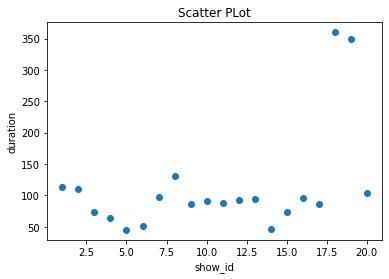

In [ ]:
plt.scatter(movies['show_id'],movies['duration'])
plt.title("Scatter PLot")
plt.xlabel('show_id')
plt.ylabel('duration')
plt.show()

In [ ]:
feature_cols = ['show_id','duration']
x = movies.iloc[:, [0,4]].values  

In [ ]:
x

array([[  1, 113],
       [  2, 110],
       [  3,  74],
       [  4,  64],
       [  5,  45],
       [  6,  52],
       [  7,  98],
       [  8, 131],
       [  9,  87],
       [ 10,  92],
       [ 11,  88],
       [ 12,  93],
       [ 13,  94],
       [ 14,  46],
       [ 15,  74],
       [ 16,  96],
       [ 17,  87],
       [ 18, 360],
       [ 19, 350],
       [ 20, 104]])

In [ ]:
y = movies.iloc[:,2].values

In [ ]:
y


array([0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1])

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =  train_test_split(x,y,test_size = 0.3, random_state= 1)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
x_train = sc_X.fit_transform(x_train)
x_test = sc_X.transform(x_test)

In [ ]:
print(x_train)

[[-1.00320888 -0.84728964]
 [ 1.19659854  2.42178061]
 [-0.49556101  0.04521843]
 [-1.51085674 -0.17271958]
 [ 0.51973472 -0.83691164]
 [-1.6800727  -0.14158558]
 [ 1.53503045 -0.23498759]
 [ 1.36581449  2.31800061]
 [-0.1571291  -0.3595236 ]
 [ 0.85816663 -0.3180116 ]
 [-0.32634506 -0.4114136 ]
 [ 0.35051876 -0.3387676 ]
 [ 0.18130281 -0.3491456 ]
 [-0.83399292 -0.77464363]]


In [ ]:
print(x_test)

[[-1.17242483 -0.65010762]
 [ 1.02738258 -0.4114136 ]
 [-0.66477697 -0.29725559]
 [ 0.01208685 -0.4010356 ]
 [-1.34164079 -0.54632761]
 [ 0.68895067 -0.54632761]]


In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier() #we are using default parameters: criteria = gini, max_depth is not restricted
classifier = classifier.fit(x_train,y_train)

In [ ]:
y_pred = classifier.predict(x_test)#Accuracy
from sklearn import metrics
print('Accuracy Score:', metrics.accuracy_score(y_test,y_pred))

Accuracy Score: 0.6666666666666666


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[3 1]
 [1 1]]


In [ ]:
from sklearn.tree import export_graphviz

In [ ]:
!pip install six

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from six import StringIO

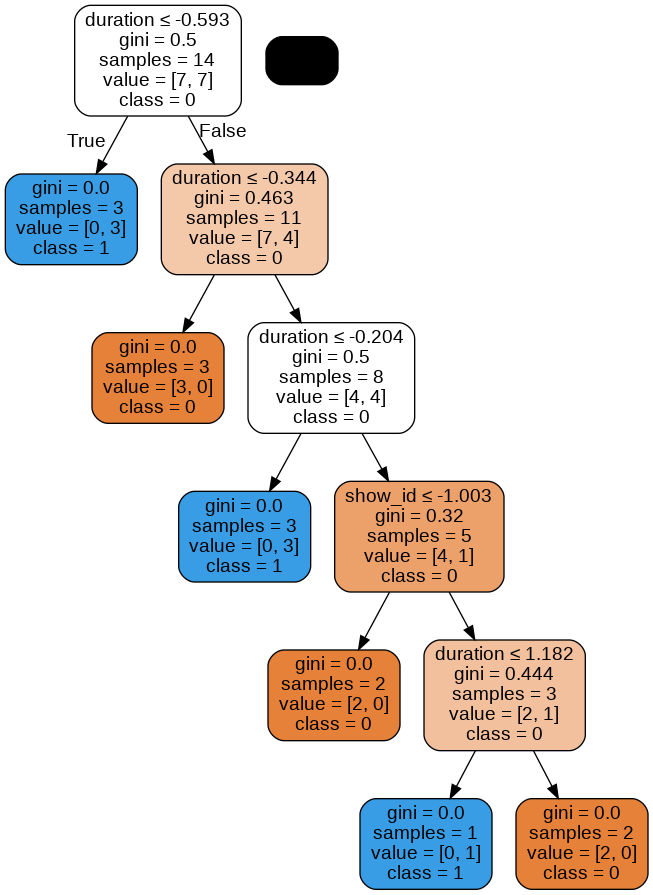

In [ ]:
from IPython.display import Image  
import pydotplus
data = StringIO()
export_graphviz(classifier, out_file=data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(data.getvalue())  
Image(graph.create_png())

In [ ]:
# Create Decision Tree classifer object
classifier = DecisionTreeClassifier(criterion="entropy", max_depth=3)# Train Decision Tree Classifer
classifier = classifier.fit(x_train,y_train)#Predict the response for test dataset
y_pred = classifier.predict(x_test)# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6666666666666666


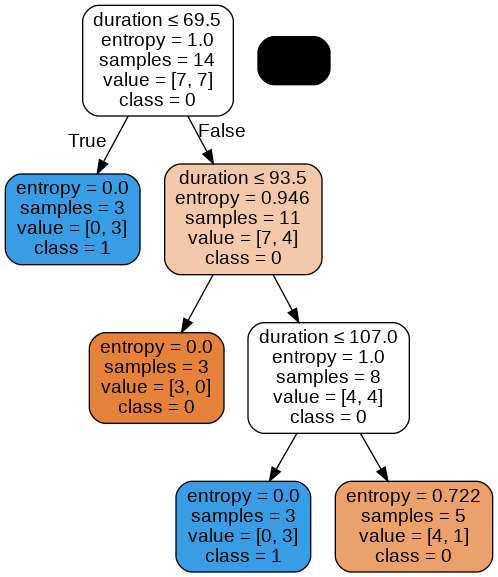

In [ ]:
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())